### Question(1) part (A)

## Even:

In [3]:
from sympy import symbols, Eq, solve, exp, latex
from IPython.display import display, Math

A, B, kappa, a, m, phi, hbar = symbols('A B kappa a m phi_0 hbar')

expr1 = Eq(B * (exp(2 * kappa * a) - 1), A * ((2 * m * phi / hbar**2 / kappa) - 1))

display(Math(latex(expr1)))

simplified_eq = solve(expr1, B)[0]  

display(Math(latex(simplified_eq)))

final_form = Eq(exp(-2 * kappa * a), hbar**2 * kappa / (m * phi) - 1)

display(Math(latex(final_form)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

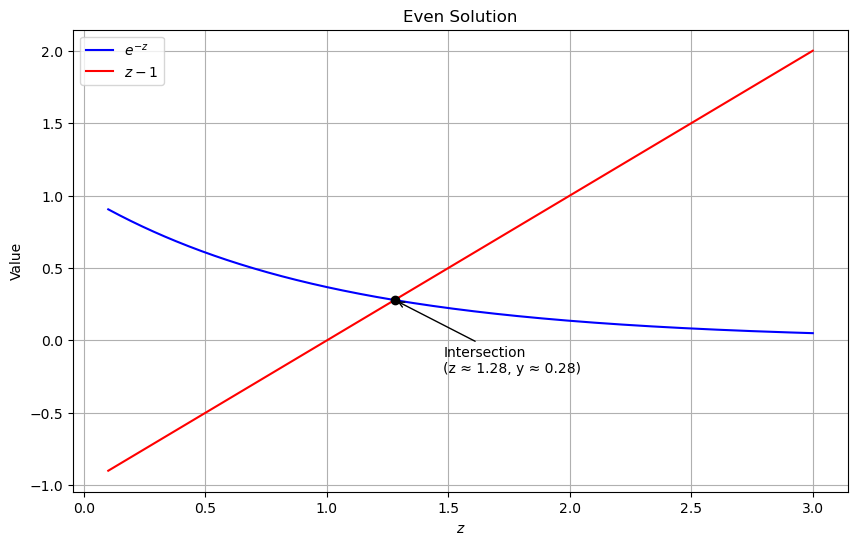

In [4]:
import numpy as np
import matplotlib.pyplot as plt

z_vals = np.linspace(0.1, 3, 500)

lhs_vals = np.exp(-z_vals)  
rhs_vals = z_vals - 1       


diff_vals = np.abs(lhs_vals - rhs_vals)
intersection_index = np.argmin(diff_vals)
z_intersection = z_vals[intersection_index]
y_intersection = lhs_vals[intersection_index]

plt.figure(figsize=(10, 6))
plt.plot(z_vals, lhs_vals, label=r'$e^{-z}$', color='blue')
plt.plot(z_vals, rhs_vals, label=r'$z - 1$', color='red')

plt.plot(z_intersection, y_intersection, 'ko')  
plt.annotate(f'Intersection\n(z ≈ {z_intersection:.2f}, y ≈ {y_intersection:.2f})',
             xy=(z_intersection, y_intersection), 
             xytext=(z_intersection + 0.2, y_intersection - 0.5),
             arrowprops=dict(arrowstyle="->", color='black'))

plt.xlabel(r'$z$')
plt.ylabel('Value')
plt.title('Even Solution')

# Adding legend and grid
plt.legend()
plt.grid()

# Show the plot
plt.show()

## Odd:

In [6]:
A, B, kappa, a, m, phi, hbar = symbols('A B kappa a m phi_0 hbar')

expr1 = Eq(B * (exp(2 * kappa * a) + 1), A * ((2 * m * phi / hbar**2 / kappa) - 1))

display(Math(latex(expr1)))

simplified_eq = solve(expr1, B)[0]  

display(Math(latex(simplified_eq)))

final_form = Eq(exp(-2 * kappa * a), -hbar**2 * kappa / (m * phi) + 1)

display(Math(latex(final_form)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

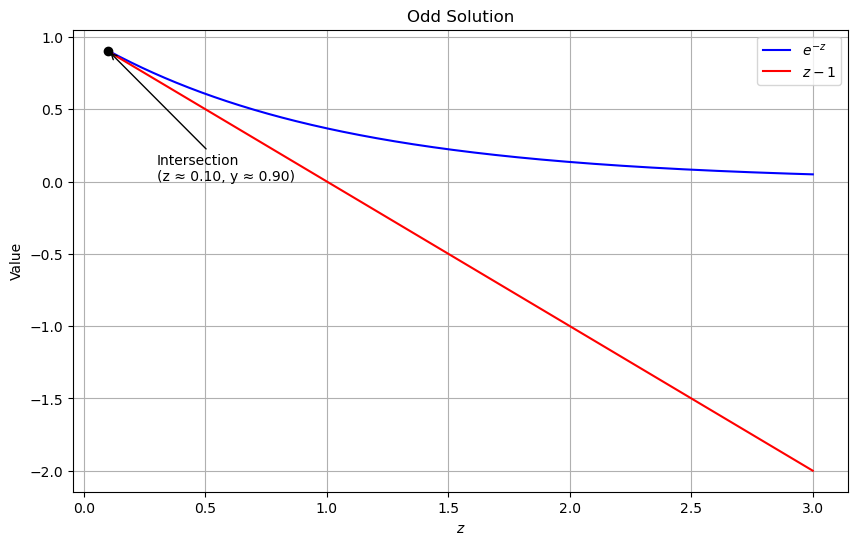

In [7]:
import numpy as np
import matplotlib.pyplot as plt

z_vals = np.linspace(0.1, 3, 500)

lhs_vals = np.exp(-z_vals)  
rhs_vals = 1 - z_vals        


diff_vals = np.abs(lhs_vals - rhs_vals)
intersection_index = np.argmin(diff_vals)
z_intersection = z_vals[intersection_index]
y_intersection = lhs_vals[intersection_index]

plt.figure(figsize=(10, 6))
plt.plot(z_vals, lhs_vals, label=r'$e^{-z}$', color='blue')
plt.plot(z_vals, rhs_vals, label=r'$z - 1$', color='red')

plt.plot(z_intersection, y_intersection, 'ko')  
plt.annotate(f'Intersection\n(z ≈ {z_intersection:.2f}, y ≈ {y_intersection:.2f})',
             xy=(z_intersection, y_intersection), 
             xytext=(z_intersection + 0.2, y_intersection - 0.9),
             arrowprops=dict(arrowstyle="->", color='black'))

plt.xlabel(r'$z$')
plt.ylabel('Value')
plt.title('Odd Solution')

# Adding legend and grid
plt.legend()
plt.grid()

# Show the plot
plt.show()


### Question(3) Part(a)

# $E > V_0 :$

In [10]:
from sympy import symbols, Eq, I, exp, solve, simplify, sqrt, Abs, sin
from IPython.display import display, Math

# Define symbols
A, B, C, D, F = symbols('A B C D F')
k, k1, a, m, E, V, hbar, V0 = symbols('k k1 a m E V hbar V0')

# Step 1: Define equations based on boundary conditions

# Equation at x = 0
eq1 = Eq(A + B, C + D)
display(Math(r"A + B = C + D"))

# Continuity of the derivative
eq2 = Eq(I * k * (A - B), I * k1 * (C - D))
display(Math(r"i k (A - B) = i k_1 (C - D)"))

# Equation at x = a
eq3 = Eq(C * exp(I * k1 * a) + D * exp(-I * k1 * a), F * exp(I * k * a))
display(Math(r"C e^{i k_1 a} + D e^{-i k_1 a} = F e^{i k a}"))

# Continuity of the derivative
eq4 = Eq(I * k1 * (C * exp(I * k1 * a) - D * exp(-I * k1 * a)), I * k * F * exp(I * k * a))
display(Math(r"i k_1 (C e^{i k_1 a} - D e^{-i k_1 a}) = i k F e^{i k a}"))

# Step 2: Solve equations (1) and (2) to express C and D in terms of A and B
solution_CD = solve((eq1, eq2), (C, D))
C_expr = solution_CD[C]
D_expr = solution_CD[D]

# Step 3: Substitute C and D from Step 2 into equations (3) and (4)
eq3_sub = eq3.subs({C: C_expr, D: D_expr})
eq4_sub = eq4.subs({C: C_expr, D: D_expr})

# Step 4: Solve for B and F in terms of A
solution_BF = solve((eq3_sub, eq4_sub), (B, F))
B_expr = simplify(solution_BF[B])
F_expr = simplify(solution_BF[F])

# Step 5: Substitute k and k1
k_expr = sqrt(2 * m * E) / hbar
k1_expr = sqrt(2 * m * (E - V)) / hbar
B_expr = B_expr.subs({k: k_expr, k1: k1_expr})
F_expr = F_expr.subs({k: k_expr, k1: k1_expr})

# Simplify the final expressions
B_expr = simplify(B_expr)
F_expr = simplify(F_expr)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
B_expr

-A*V*m*(exp(2*sqrt(2)*I*a*sqrt(m*(E - V))/hbar) - 1)/(-2*E*m*exp(2*sqrt(2)*I*a*sqrt(m*(E - V))/hbar) + 2*E*m + V*m*exp(2*sqrt(2)*I*a*sqrt(m*(E - V))/hbar) - V*m + 2*sqrt(E*m)*sqrt(m*(E - V))*exp(2*sqrt(2)*I*a*sqrt(m*(E - V))/hbar) + 2*sqrt(E*m)*sqrt(m*(E - V)))

In [12]:
F_expr

4*A*sqrt(E*m)*sqrt(m*(E - V))*exp(-sqrt(2)*I*a*(sqrt(E*m) - sqrt(m*(E - V)))/hbar)/(-E*m*exp(2*sqrt(2)*I*a*sqrt(m*(E - V))/hbar) + E*m - m*(E - V)*exp(2*sqrt(2)*I*a*sqrt(m*(E - V))/hbar) + m*(E - V) + 2*sqrt(E*m)*sqrt(m*(E - V))*exp(2*sqrt(2)*I*a*sqrt(m*(E - V))/hbar) + 2*sqrt(E*m)*sqrt(m*(E - V)))

In [13]:
T = (F_expr)**2 / (A)**2
T = T.simplify()
T = T.subs(V, V0)
T = T.simplify()
T.subs({k: k_expr, k1: k1_expr})
T_b1 = T
R = 1 - T
R.simplify()
T_b1

16*E*m**2*(E - V0)*exp(-2*sqrt(2)*I*a*(sqrt(E*m) - sqrt(m*(E - V0)))/hbar)/(-E*m*exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar) + E*m - m*(E - V0)*exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar) + m*(E - V0) + 2*sqrt(E*m)*sqrt(m*(E - V0))*exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar) + 2*sqrt(E*m)*sqrt(m*(E - V0)))**2

In [14]:
R = (B_expr)**2 / (A)**2
R.simplify()
R = R.subs(V, V0)
R = R.simplify()
R.subs({k: k_expr, k1: k1_expr})
R_b1 = R
R_b1

V0**2*m**2*(1 - exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar))**2/(-2*E*m*exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar) + 2*E*m + V0*m*exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar) - V0*m + 2*sqrt(E*m)*sqrt(m*(E - V0))*exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar) + 2*sqrt(E*m)*sqrt(m*(E - V0)))**2

# $E < V_0 :$

In [16]:
from sympy import symbols, Eq, I, exp, solve, simplify, sqrt, Abs, sin
from IPython.display import display, Math

# Define symbols
A, B, C, D, F = symbols('A B C D F')
k, kappa, a, m, E, V, hbar, V0 = symbols('k kappa a m E V hbar V0')

# Step 1: Define equations based on boundary conditions

# Equation at x = 0
eq1 = Eq(A + B, C + D)
display(Math(r"A + B = C + D"))

# Continuity of the derivative
eq2 = Eq(I * k * (A - B), kappa * (C - D))
display(Math(r"i k (A - B) = \kappa (C - D)"))

# Equation at x = a
eq3 = Eq(C * exp(kappa * a) + D * exp(-kappa * a), F * exp(I * k * a))
display(Math(r"C e^{\kappa a} + D e^{-\kappa a} = F e^{i k a}"))

# Continuity of the derivative
eq4 = Eq(kappa * (C * exp(kappa * a) - D * exp(-kappa * a)), I * k * F * exp(I * k * a))
display(Math(r"\kappa (C e^{\kappa a} - D e^{-\kappa a}) = i k F e^{i k a}"))

# Step 2: Solve equations (1) and (2) to express C and D in terms of A and B
solution_CD = solve((eq1, eq2), (C, D))
C_expr = solution_CD[C]
D_expr = solution_CD[D]

# Step 3: Substitute C and D from Step 2 into equations (3) and (4)
eq3_sub = eq3.subs({C: C_expr, D: D_expr})
eq4_sub = eq4.subs({C: C_expr, D: D_expr})

# Step 4: Solve for B and F in terms of A
solution_BF = solve((eq3_sub, eq4_sub), (B, F))
B_expr = simplify(solution_BF[B])
F_expr = simplify(solution_BF[F])

# Step 5: Substitute k and kappa
k_expr = sqrt(2 * m * E) / hbar
kappa_expr = sqrt(-2 * m * (E - V)) / hbar
B_expr = B_expr.subs({k: k_expr, kappa: kappa_expr})
F_expr = F_expr.subs({k: k_expr, kappa: kappa_expr})

# Simplify the final expressions
B_expr = simplify(B_expr)
F_expr = simplify(F_expr)


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [17]:
B_expr

A*V*m*(exp(2*sqrt(2)*a*sqrt(-m*(E - V))/hbar) - 1)/(2*E*m*exp(2*sqrt(2)*a*sqrt(-m*(E - V))/hbar) - 2*E*m - V*m*exp(2*sqrt(2)*a*sqrt(-m*(E - V))/hbar) + V*m + 2*I*sqrt(E*m)*sqrt(-m*(E - V))*exp(2*sqrt(2)*a*sqrt(-m*(E - V))/hbar) + 2*I*sqrt(E*m)*sqrt(-m*(E - V)))

In [18]:
F_expr

4*I*A*sqrt(E*m)*sqrt(m*(-E + V))*exp(sqrt(2)*a*(-I*sqrt(E*m) + sqrt(m*(-E + V)))/hbar)/(2*E*m*exp(2*sqrt(2)*a*sqrt(m*(-E + V))/hbar) - 2*E*m - V*m*exp(2*sqrt(2)*a*sqrt(m*(-E + V))/hbar) + V*m + 2*I*sqrt(E*m)*sqrt(m*(-E + V))*exp(2*sqrt(2)*a*sqrt(m*(-E + V))/hbar) + 2*I*sqrt(E*m)*sqrt(m*(-E + V)))

In [19]:
T = (F_expr)**2 / (A)**2
T = T.simplify()
T = T.subs(V, V0)
T = T.simplify()
T.subs({k: k_expr, kappa: kappa_expr})
T_s = T
T_s

16*E*m**2*(E - V0)*exp(-2*sqrt(2)*a*(I*sqrt(E*m) - sqrt(-m*(E - V0)))/hbar)/(2*E*m*exp(2*sqrt(2)*a*sqrt(-m*(E - V0))/hbar) - 2*E*m - V0*m*exp(2*sqrt(2)*a*sqrt(-m*(E - V0))/hbar) + V0*m + 2*I*sqrt(E*m)*sqrt(-m*(E - V0))*exp(2*sqrt(2)*a*sqrt(-m*(E - V0))/hbar) + 2*I*sqrt(E*m)*sqrt(-m*(E - V0)))**2

In [20]:
from sympy import symbols, Eq, I, exp, cosh, sinh, simplify, solve
from IPython.display import display, Math

# Define symbols
A, B, C, D, F = symbols('A B C D F')
k1, kappa, a = symbols('k1 kappa a')

# Define equations based on boundary conditions at x = 0 and x = a

# Equation at x = 0
# 1. Continuity of the wavefunction: A + B = C + D
eq1 = Eq(A + B, C + D)

# 2. Continuity of the derivative: i*k1*(A - B) = kappa*(C - D)
eq2 = Eq(I * k1 * (A - B), kappa * (C - D))

# Equation at x = a
# 3. Continuity of the wavefunction: C * exp(kappa * a) + D * exp(-kappa * a) = F * exp(I * k1 * a)
eq3 = Eq(C * exp(kappa * a) + D * exp(-kappa * a), F * exp(I * k1 * a))

# 4. Continuity of the derivative: kappa * (C * exp(kappa * a) - D * exp(-kappa * a)) = i*k1 * F * exp(i*k1 * a)
eq4 = Eq(kappa * (C * exp(kappa * a) - D * exp(-kappa * a)), I * k1 * F * exp(I * k1 * a))

# Solve equations 3 and 4 to express C and D in terms of F
solution_CD = solve((eq3, eq4), (C, D))
C_expr = solution_CD[C]
D_expr = solution_CD[D]

# Substitute C and D from Step 2 into equations (1) and (2)
eq1_sub = eq1.subs({C: C_expr, D: D_expr})
eq2_sub = eq2.subs({C: C_expr, D: D_expr})

# Solve for B/A and F/A
solution_BF = solve((eq1_sub, eq2_sub), (B, F))
B_over_A = simplify(solution_BF[B]**2 / A**2)
F_over_A = simplify(solution_BF[F]**2 / A**2)

In [21]:
display(Math(r"Reflection"))
B_over_A

<IPython.core.display.Math object>

(k1**2*exp(2*a*kappa) - k1**2 + kappa**2*exp(2*a*kappa) - kappa**2)**2/(k1**2*exp(2*a*kappa) - k1**2 + 2*I*k1*kappa*exp(2*a*kappa) + 2*I*k1*kappa - kappa**2*exp(2*a*kappa) + kappa**2)**2

In [22]:
display(Math(r"Transmition"))
F_over_A

<IPython.core.display.Math object>

-16*k1**2*kappa**2*exp(-2*a*(I*k1 - kappa))/(k1**2*exp(2*a*kappa) - k1**2 + 2*I*k1*kappa*exp(2*a*kappa) + 2*I*k1*kappa - kappa**2*exp(2*a*kappa) + kappa**2)**2

## part(B)

In [58]:
from sympy import symbols, Eq, solve, sqrt, pi

E, V0, m, hbar, a, n = symbols('E V0 m hbar a n', real=True, positive=True)

k1 = sqrt(2 * m * (E - V0)) / hbar

# Set up the equation k1 * a = n * pi
equation = Eq(k1 * a, n * pi)

E_solution = solve(equation, E)[0]

display(Math(r"E_(solution):"))

E_solution

<IPython.core.display.Math object>

V0 + pi**2*hbar**2*n**2/(2*a**2*m)

### Question(4)

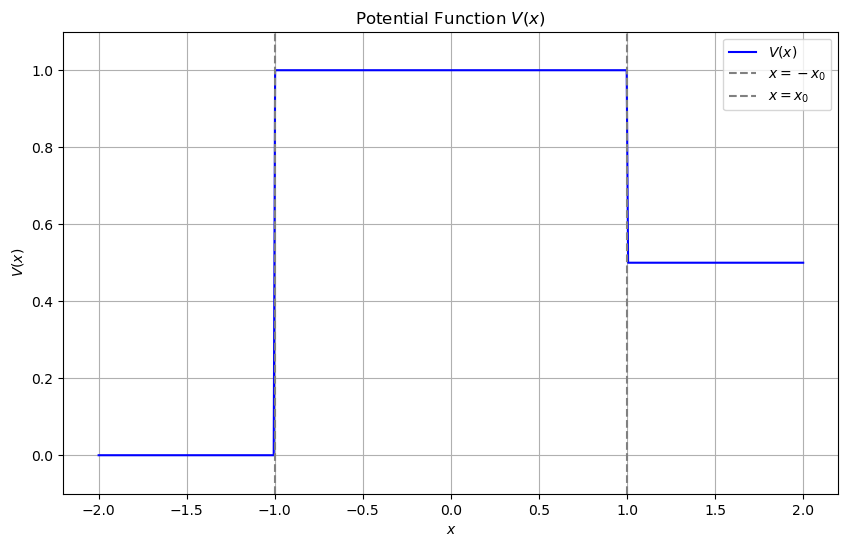

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
V0 = 1  # Height of the potential in Region II
x0 = 1  # Position boundary for the potential step

# Define the piecewise function for V(x)
def V(x):
    if x <= -x0:
        return 0
    elif -x0 < x < x0:
        return V0
    else:
        return V0 / 2

# Generate x values
x_values = np.linspace(-2 * x0, 2 * x0, 500)
# Compute V(x) for each x value
V_values = [V(x) for x in x_values]

# Plot the potential function
plt.figure(figsize=(10, 6))
plt.plot(x_values, V_values, label=r"$V(x)$", color='blue')
plt.axvline(-x0, color='gray', linestyle='--', label=r"$x = -x_0$")
plt.axvline(x0, color='gray', linestyle='--', label=r"$x = x_0$")
plt.xlabel(r"$x$")
plt.ylabel(r"$V(x)$")
plt.title("Potential Function $V(x)$")
plt.ylim(-0.1, 1.1 * V0)
plt.legend()
plt.grid()
plt.show()

In [66]:
from sympy import symbols, Eq, I, exp, solve, simplify, sqrt, Abs, sin, cosh, sinh, cos
from IPython.display import display, Math

# Define symbols
A, B, C, D, F = symbols('A B C D F')
k, k1, k2, a, m, E, V, hbar, V0 = symbols('k k1 k2 a m E V hbar V0')

# Step 1: Define equations based on boundary conditions

# Equation at x = 0
eq1 = Eq(A + B, C + D)
display(Math(r"A + B = C + D"))

# Continuity of the derivative
eq2 = Eq(I * k * (A - B), I * k1 * (C - D))
display(Math(r"i k (A - B) = i k_1 (C - D)"))

# Equation at x = a
eq3 = Eq(C * exp(I * k1 * a) + D * exp(-I * k1 * a), F * exp(I * k2 * a))
display(Math(r"C e^{i k_1 a} + D e^{-i k_1 a} = F e^{i k_2 a}"))

# Continuity of the derivative
eq4 = Eq(I * k1 * (C * exp(I * k1 * a) - D * exp(-I * k1 * a)), I * k * F * exp(I * k2 * a))
display(Math(r"i k_1 (C e^{i k_1 a} - D e^{-i k_1 a}) = i k F e^{i k_2 a}"))

# Step 2: Solve equations (1) and (2) to express C and D in terms of A and B
solution_CD = solve((eq1, eq2), (C, D))
C_expr = solution_CD[C]
D_expr = solution_CD[D]

# Step 3: Substitute C and D from Step 2 into equations (3) and (4)
eq3_sub = eq3.subs({C: C_expr, D: D_expr})
eq4_sub = eq4.subs({C: C_expr, D: D_expr})

# Step 4: Solve for B and F in terms of A
solution_BF = solve((eq3_sub, eq4_sub), (B, F))
B_expr = simplify(solution_BF[B])
F_expr = simplify(solution_BF[F])

# Step 5: Substitute k and k1
k_expr = sqrt(2 * m * E) / hbar
k1_expr = sqrt(2 * m * (E - V)) / hbar
k2_expr = k1_expr = sqrt(2 * m * (E - (V/2))) / hbar
B_expr = B_expr.subs({k: k_expr, k1: k1_expr, k2: k2_expr})
F_expr = F_expr.subs({k: k_expr, k1: k1_expr, k2: k2_expr})

# Simplify the final expressions
B_expr = simplify(B_expr)
F_expr = simplify(F_expr)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [67]:
B_expr

-A*V*m*(exp(2*I*a*sqrt(m*(2*E - V))/hbar) - 1)/(-4*E*m*exp(2*I*a*sqrt(m*(2*E - V))/hbar) + 4*E*m + V*m*exp(2*I*a*sqrt(m*(2*E - V))/hbar) - V*m + 2*sqrt(2)*sqrt(E*m)*sqrt(m*(2*E - V))*exp(2*I*a*sqrt(m*(2*E - V))/hbar) + 2*sqrt(2)*sqrt(E*m)*sqrt(m*(2*E - V)))

In [70]:
F_expr

4*sqrt(2)*A*sqrt(E*m)*sqrt(m*(2*E - V))/(-4*E*m*exp(2*I*a*sqrt(m*(2*E - V))/hbar) + 4*E*m + V*m*exp(2*I*a*sqrt(m*(2*E - V))/hbar) - V*m + 2*sqrt(2)*sqrt(E*m)*sqrt(m*(2*E - V))*exp(2*I*a*sqrt(m*(2*E - V))/hbar) + 2*sqrt(2)*sqrt(E*m)*sqrt(m*(2*E - V)))

In [72]:
T = (F_expr)**2 / (A)**2
T = T.simplify()
T = T.subs(V, V0)
T = T.simplify()
T.subs({k: k_expr, k1: k1_expr, k2: k2_expr})
T_b = T
T_b

32*E*m**2*(2*E - V0)/(-4*E*m*exp(2*I*a*sqrt(m*(2*E - V0))/hbar) + 4*E*m + V0*m*exp(2*I*a*sqrt(m*(2*E - V0))/hbar) - V0*m + 2*sqrt(2)*sqrt(E*m)*sqrt(m*(2*E - V0))*exp(2*I*a*sqrt(m*(2*E - V0))/hbar) + 2*sqrt(2)*sqrt(E*m)*sqrt(m*(2*E - V0)))**2

In [74]:
R = (B_expr)**2 / (A)**2
R.simplify()
R = R.subs(V, V0)
R = R.simplify()
R.subs({k: k_expr, k1: k1_expr, k2: k2_expr})
R_b = R
R_b

V0**2*m**2*(1 - exp(2*I*a*sqrt(m*(2*E - V0))/hbar))**2/(-4*E*m*exp(2*I*a*sqrt(m*(2*E - V0))/hbar) + 4*E*m + V0*m*exp(2*I*a*sqrt(m*(2*E - V0))/hbar) - V0*m + 2*sqrt(2)*sqrt(E*m)*sqrt(m*(2*E - V0))*exp(2*I*a*sqrt(m*(2*E - V0))/hbar) + 2*sqrt(2)*sqrt(E*m)*sqrt(m*(2*E - V0)))**2

### Part(b)

In [76]:
#transmition comparison
T_b2 = T_b1/T_b
T_b2.simplify()
T_b2.rewrite(sin).simplify()
T_b2

(E - V0)*(-4*E*m*exp(2*I*a*sqrt(m*(2*E - V0))/hbar) + 4*E*m + V0*m*exp(2*I*a*sqrt(m*(2*E - V0))/hbar) - V0*m + 2*sqrt(2)*sqrt(E*m)*sqrt(m*(2*E - V0))*exp(2*I*a*sqrt(m*(2*E - V0))/hbar) + 2*sqrt(2)*sqrt(E*m)*sqrt(m*(2*E - V0)))**2*exp(-2*sqrt(2)*I*a*(sqrt(E*m) - sqrt(m*(E - V0)))/hbar)/(2*(2*E - V0)*(-E*m*exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar) + E*m - m*(E - V0)*exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar) + m*(E - V0) + 2*sqrt(E*m)*sqrt(m*(E - V0))*exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar) + 2*sqrt(E*m)*sqrt(m*(E - V0)))**2)

In [77]:
#Reflection comparison
R_b2 = R_b1/R_b
R_b2.simplify()
R_b2.rewrite(sin).simplify()
R_b2

(1 - exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar))**2*(-4*E*m*exp(2*I*a*sqrt(m*(2*E - V0))/hbar) + 4*E*m + V0*m*exp(2*I*a*sqrt(m*(2*E - V0))/hbar) - V0*m + 2*sqrt(2)*sqrt(E*m)*sqrt(m*(2*E - V0))*exp(2*I*a*sqrt(m*(2*E - V0))/hbar) + 2*sqrt(2)*sqrt(E*m)*sqrt(m*(2*E - V0)))**2/((1 - exp(2*I*a*sqrt(m*(2*E - V0))/hbar))**2*(-2*E*m*exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar) + 2*E*m + V0*m*exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar) - V0*m + 2*sqrt(E*m)*sqrt(m*(E - V0))*exp(2*sqrt(2)*I*a*sqrt(m*(E - V0))/hbar) + 2*sqrt(E*m)*sqrt(m*(E - V0)))**2)

In [13]:
from sympy import symbols, limit, oo, ln, exp, sech, simplify

# Define symbols with assumptions
T = symbols('T', real=True)  # T can be positive or negative
E, k_B = symbols('E k_B', positive=True)  # Assume E and k_B are positive

# Define the function
f = (1 / T) * sech(E / (k_B * T))**2

# Find the limits as T approaches 0 from both sides
lim_T_zero_plus = limit(f, T, 0, dir='+')  # T approaches 0 from the positive side
lim_T_zero_minus = limit(f, T, 0, dir='-')  # T approaches 0 from the negative side

# Display the results
from IPython.display import display, Math

display(Math(r"\lim_{T \to 0^+} \frac{1}{T} \operatorname{sech}^2\left(\frac{E}{k_B T}\right) = "))
display(Math(f"{simplify(lim_T_zero_plus)}"))

display(Math(r"\lim_{T \to 0^-} \frac{1}{T} \operatorname{sech}^2\left(\frac{E}{k_B T}\right) = "))
display(Math(f"{simplify(lim_T_zero_minus)}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

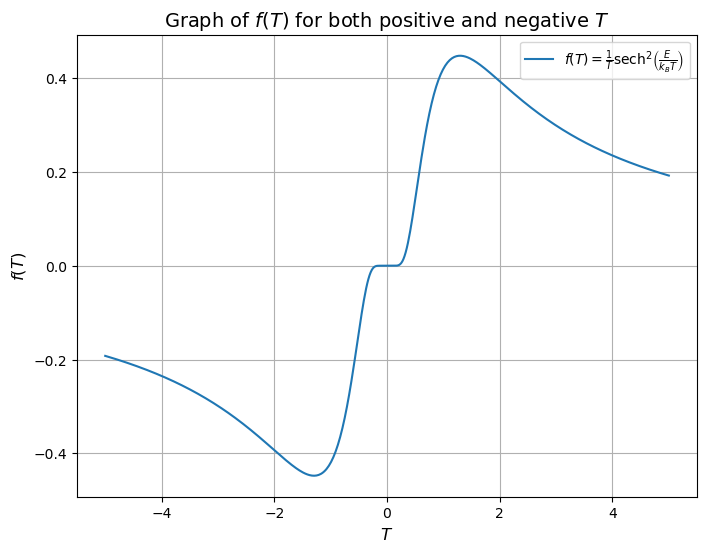

<Figure size 640x480 with 0 Axes>

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define constants
E = 1  # Example value for E
k_B = 1  # Example value for k_B

# Define the function f(T)
def f(T, E, k_B):
    return (1 / T) * np.cosh(E / (k_B * T))**(-2)

# Create an array of T values, avoiding T = 0 to prevent division by zero
T_values = np.linspace(-5, 5, 500)
T_values = T_values[T_values != 0]  # Remove 0 to avoid division by zero

# Compute the function values for the chosen T values
f_values = f(T_values, E, k_B)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(T_values, f_values, label=r"$f(T) = \frac{1}{T} \text{sech}^2\left(\frac{E}{k_B T}\right)$")
plt.title(r"Graph of $f(T)$ for both positive and negative $T$", fontsize=14)
plt.xlabel(r"$T$", fontsize=12)
plt.ylabel(r"$f(T)$", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()
plt.savefig("f_T_plot.png")